###### Political Blog Network Analysis

In [1]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
M=nx.read_gml("polblogs.gml")

In [3]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)


###Creating graph of the political blog network

C:\Users\Pavithra\Anaconda\lib\site-packages\matplotlib\font_manager.py:1279: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


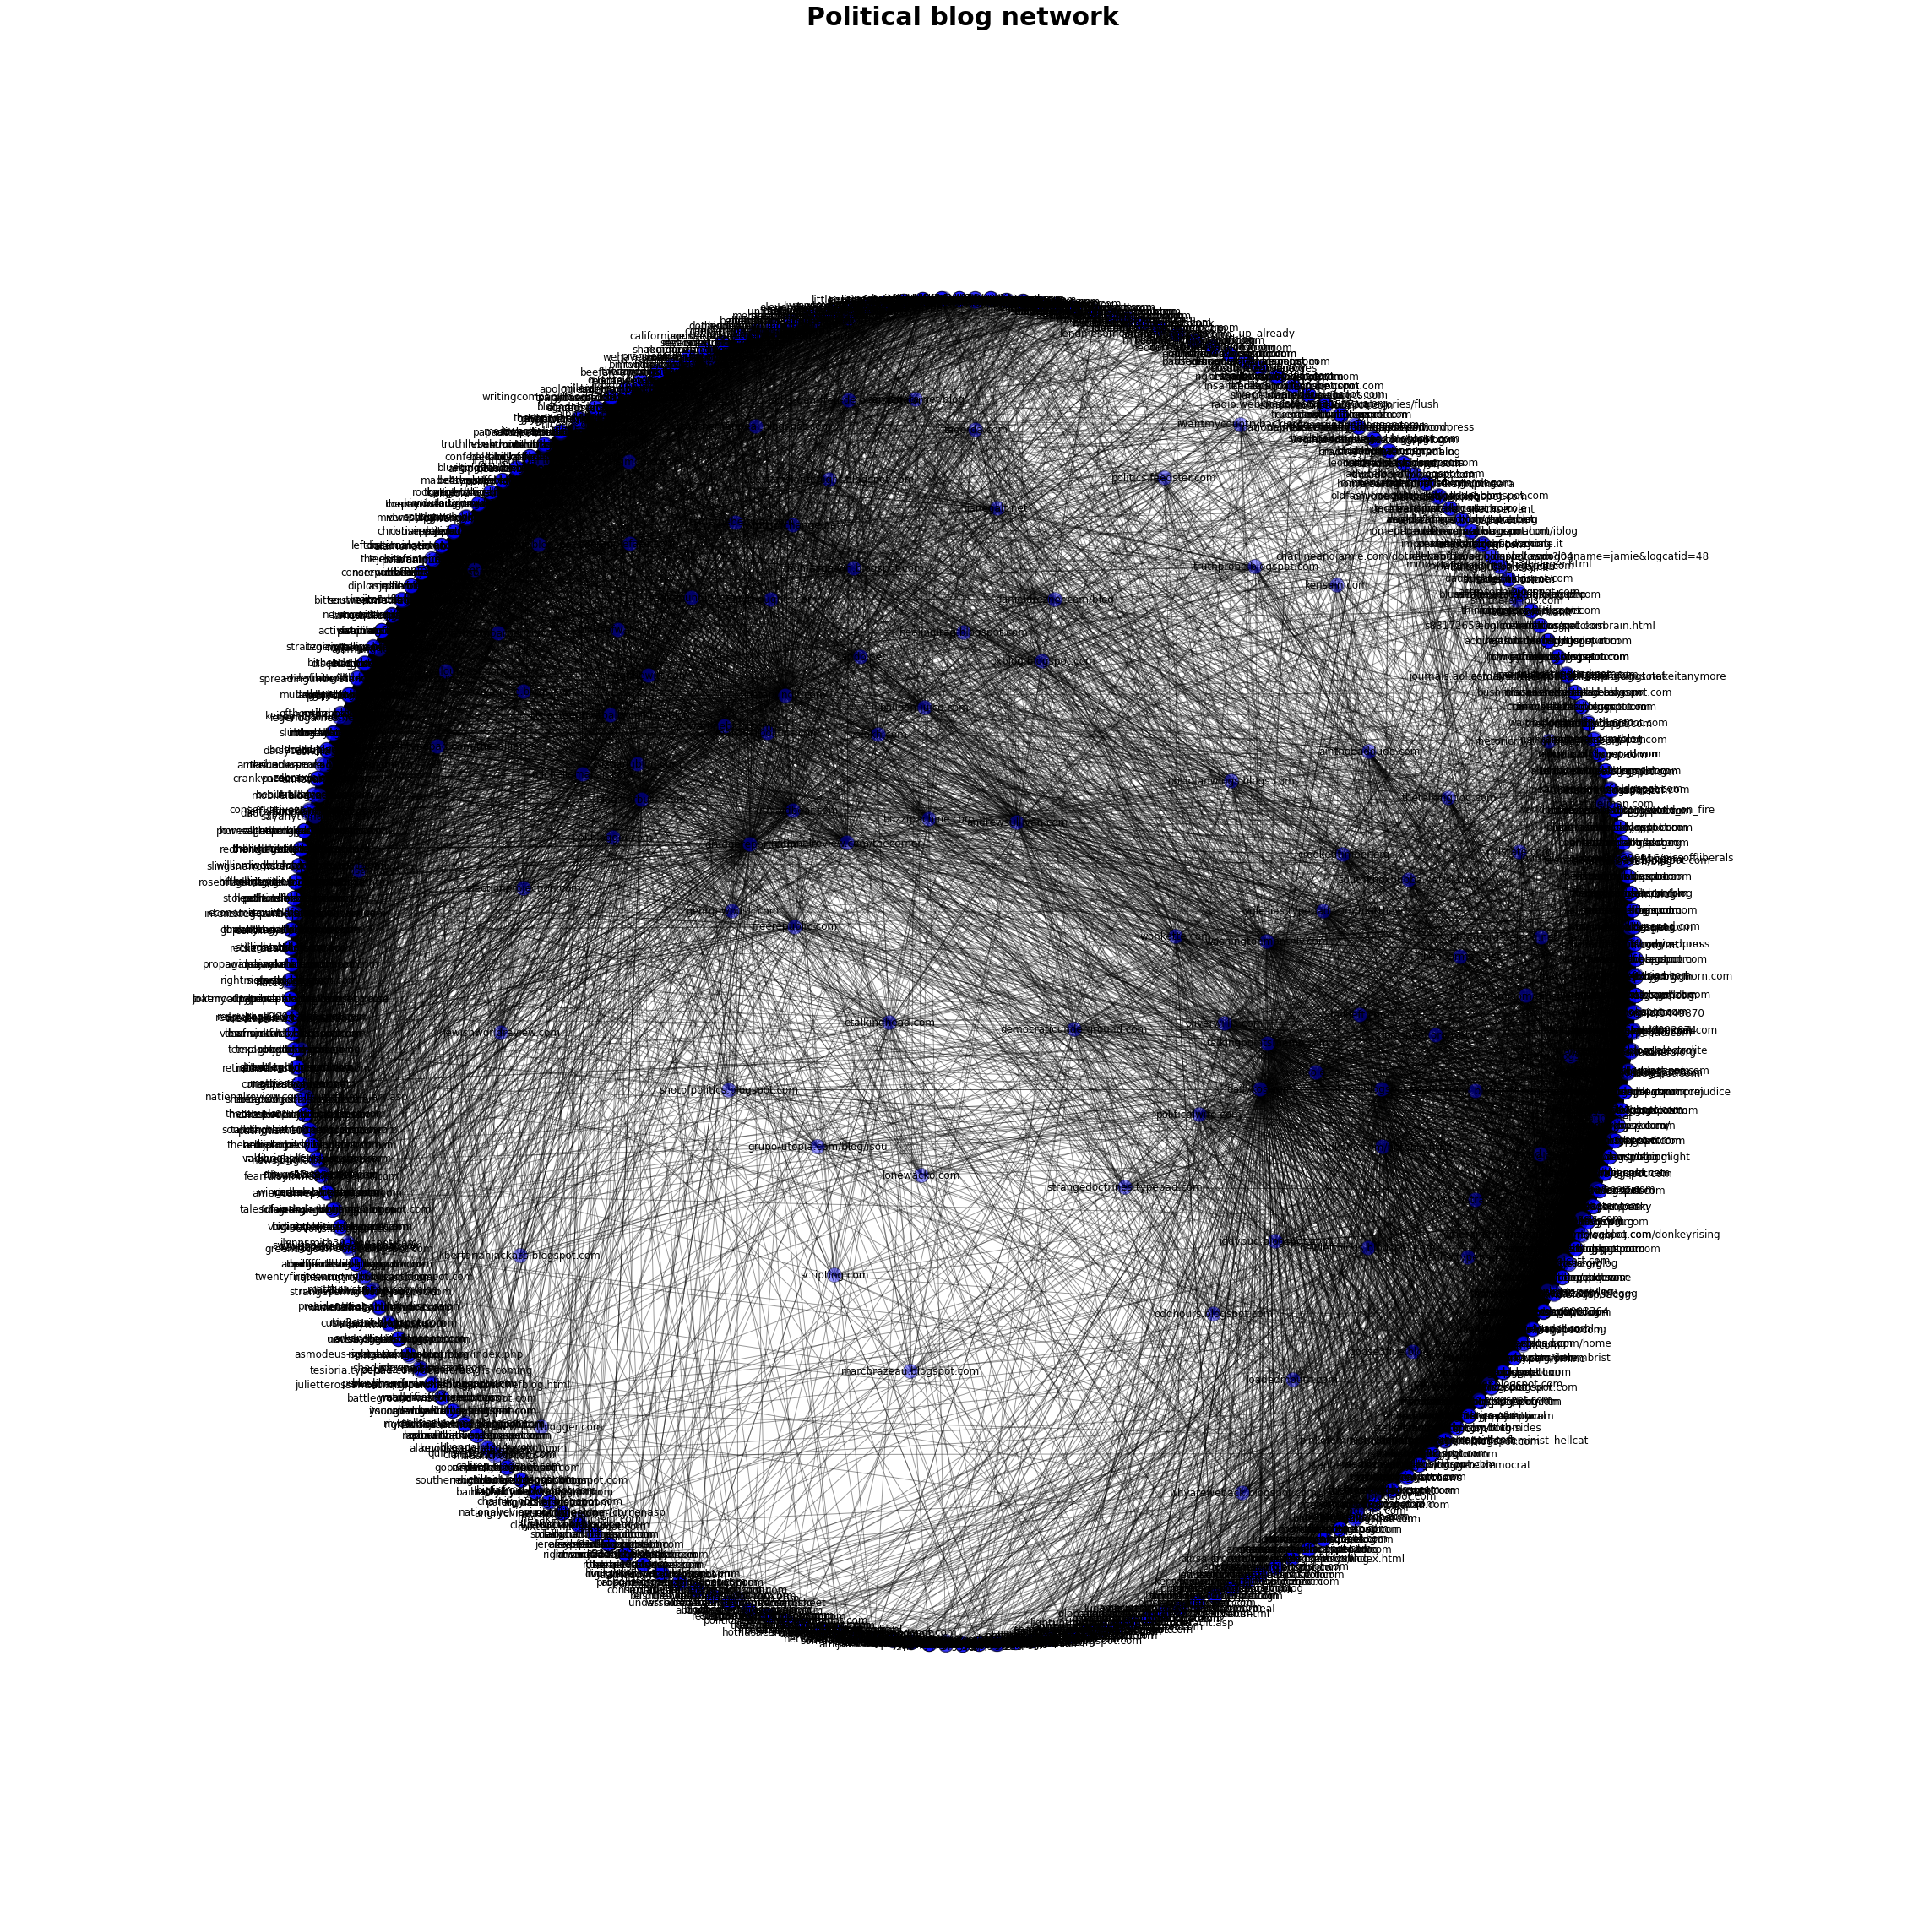

In [4]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

###The 10 most influential blogs

In [5]:
#Eiganvalue Centrality
#Centrality specifies the importance of the node(more the Centrality higher the importance)
centrality= nx.eigenvector_centrality_numpy(G)

In [6]:
#Make a list of (node, centrality)
List = []
for node in centrality:
    List.append((node,centrality[node]))

In [7]:
#sort the List in descending order to get most influential blog at the top
sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
print "The 10 most influential blogs are:"
sorted_list_desc[0:10]

The 10 most influential blogs are:


[(u'atrios.blogspot.com', 0.19460836007497936),
 (u'dailykos.com', 0.16085880865133675),
 (u'washingtonmonthly.com', 0.14572953582904336),
 (u'digbysblog.blogspot.com', 0.14165745601016713),
 (u'bodyandsoul.typepad.com', 0.14001258615025966),
 (u'liberaloasis.com', 0.13870430871243805),
 (u'tbogg.blogspot.com', 0.13695090011935732),
 (u'corrente.blogspot.com', 0.12866467087664826),
 (u'talkingpointsmemo.com', 0.12715536738447386),
 (u'dneiwert.blogspot.com', 0.12147092830075573)]

###The 10 least influential blogs

In [8]:
#sort the List in ascending order to get least influential blog at the top
sorted_list_asc=sorted(List, key=lambda x: x[1])
print "The 10 least influential blogs are:"
sorted_list_asc[0:10]

The 10 least influential blogs are:


[(u'digital-democrat.blogspot.com', -2.671224073902674e-19),
 (u'thelonedem.com', 2.188813345393623e-18),
 (u'americanworldview.tripod.com/weltansblog', 7.438790791812117e-09),
 (u'quimundus.modblog.com', 6.704098662889504e-08),
 (u'batr.org/commentary.html', 6.766561471872845e-07),
 (u'batr.net', 6.767361565991294e-07),
 (u'democratvoice.org', 1.0406263430225611e-06),
 (u'quimundus.squarespace.com', 6.098983141249339e-06),
 (u'massachusetts-liberal.com', 9.360725065425264e-06),
 (u'thingsasitis.net', 1.1599475002590745e-05)]

###Left wing and Right wing blogs

In [9]:
#Find right wing and left wing nodes and assign the colors for those node(if value=1 right wing and if value=0 left wing).
#Right wing node= Red, Left wing node=Blue
color_list=[]
GL=nx.Graph()
GR=nx.Graph()
node=M.nodes(data=True)
for i in range(0, M.number_of_nodes(), 1):
    if node[i][1]['value'] == 1:
        color_list.append('r')
        GR.add_node(node[i][0])
    else:
        color_list.append('b')
        GL.add_node(node[i][0])

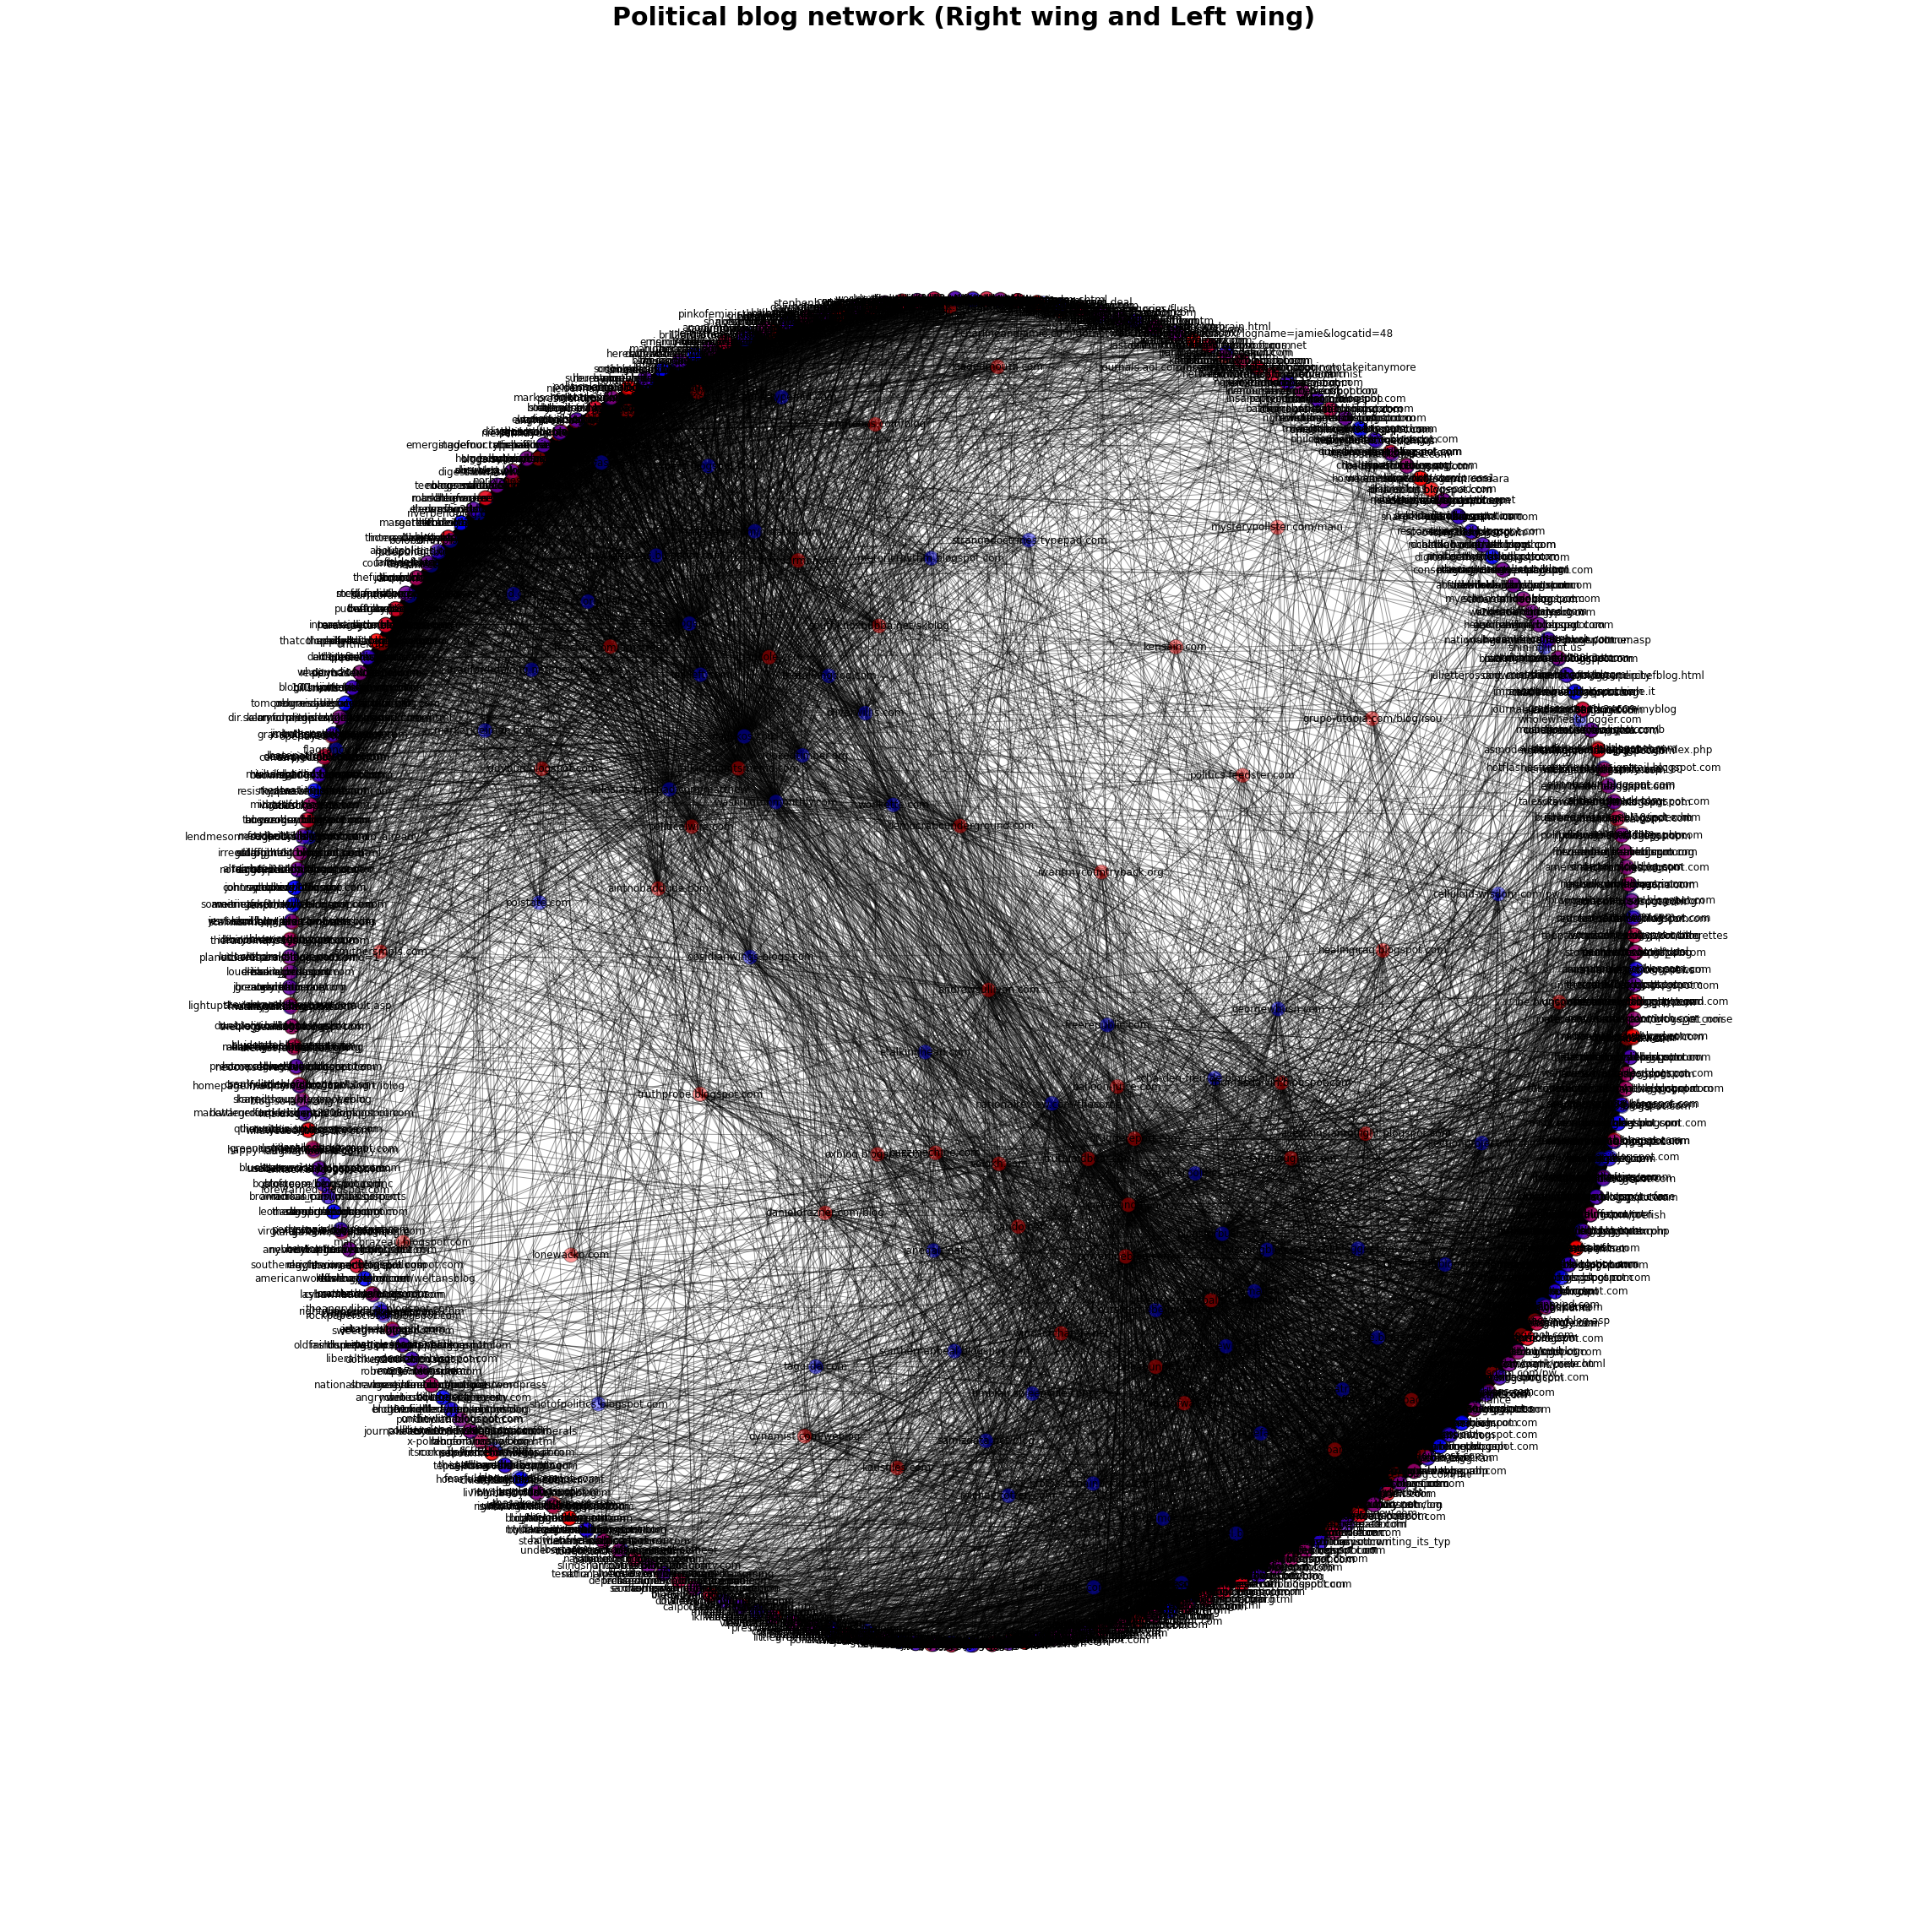

In [12]:
#Creating graph of the political blog network with Right wing node red in color and Left wing node blue in color.
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'fontname'   : 'Helvetica',
            'color'      : 'k',
            'fontweight' : 'bold',
            'fontsize'   : 30}
plt.title("Political blog network (Right wing and Left wing)", font)

nx.draw_networkx_nodes(G,pos,node_color=color_list,alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [10]:
# create weighted Left wing graph from M
for u,v,data in M.edges_iter(data=True):
    if GL.has_node(u) and GL.has_node(v) and GL.has_edge(u,v) :
        GL[u][v]['weight'] += 1
    elif GL.has_node(u) and GL.has_node(v):
        GL.add_edge(u, v, weight=1)
    else:
        continue

In [11]:
# create weighted Right wing graph from M
for u,v,data in M.edges_iter(data=True):
    if GR.has_node(u) and GR.has_node(v) and GR.has_edge(u,v) :
        GR[u][v]['weight'] += 1
    elif GR.has_node(u) and GR.has_node(v):
        GR.add_edge(u, v, weight=1)
    else:
        continue

In [13]:
#calculate the centrality of  of Left wing and right wing nodes separately. That gives importance of the node in each graph.
centrality_L= nx.eigenvector_centrality_numpy(GL)
centrality_R= nx.eigenvector_centrality_numpy(GR)

In [14]:
def sorting(centrality):
    """
    Takes centality as input.
    Make a list of (node, centrality).
    Sort the List in descending order to get most influential blog at the top.
    Sort the List in ascending order to get least influential blog at the top.
    Returns sorted list(ascending and descending order)
    """
    List = []
    for node in centrality:
        List.append((node,centrality[node]))
    sorted_list_desc =sorted(List, key=lambda x: x[1], reverse=True)
    sorted_list_asc=sorted(List, key=lambda x: x[1])
    return sorted_list_desc, sorted_list_asc

In [15]:
sorted_list_desc_L, sorted_list_asc_L = sorting(centrality_L)
print "The 10 most influential Left wing blogs are:"
sorted_list_desc_L[0:10]

The 10 most influential Left wing blogs are:


[(u'atrios.blogspot.com', 0.2101447114874378),
 (u'dailykos.com', 0.16888749802270198),
 (u'bodyandsoul.typepad.com', 0.15620581384468216),
 (u'liberaloasis.com', 0.1558615747843117),
 (u'digbysblog.blogspot.com', 0.15491799802870002),
 (u'tbogg.blogspot.com', 0.15057628736016984),
 (u'corrente.blogspot.com', 0.14461524166958675),
 (u'washingtonmonthly.com', 0.13912545257202877),
 (u'dneiwert.blogspot.com', 0.1343019164336859),
 (u'pandagon.net', 0.13254155028960113)]

In [16]:
print "The 10 least influential Left wing blogs are:"
sorted_list_asc_L[0:10]

The 10 least influential Left wing blogs are:


[(u'thelefthand.blogspot.com', -5.6622664882116344e-18),
 (u'katyggls.blogspot.com', -5.566985530243661e-18),
 (u'wtf.mindsay.com', -5.289383491795082e-18),
 (u'njn-blogogram.blogspot.com', -5.1227313984397796e-18),
 (u'nuntius.blogspot.com', -4.874890109780075e-18),
 (u'nickgerman.blogspot.com', -4.782152227381447e-18),
 (u'xanga.com/allegrad', -4.618462522399623e-18),
 (u'demoliberal.blogspot.com', -4.585770169480835e-18),
 (u'xanga.com/kerry4president', -4.572083227209697e-18),
 (u'snooty.binaryclub.com/wp-rdf.php', -4.465655898939657e-18)]

In [17]:
sorted_list_desc_R, sorted_list_asc_R = sorting(centrality_R)
print "The 10 most influential Right wing blogs are:"
sorted_list_desc_R[0:10]

The 10 most influential Right wing blogs are:


[(u'instapundit.com', 0.21130462294596927),
 (u'blogsforbush.com', 0.20259499592591648),
 (u'hughhewitt.com', 0.16819176553481555),
 (u'lashawnbarber.com', 0.15892783854937373),
 (u'michellemalkin.com', 0.14770452828583153),
 (u'wizbangblog.com', 0.1467217594355303),
 (u'powerlineblog.com', 0.14614009491871854),
 (u'vodkapundit.com', 0.13718343720517892),
 (u'littlegreenfootballs.com/weblog', 0.13699993217225226),
 (u'outsidethebeltway.com', 0.12316955954206638)]

In [18]:
print "The 10 least influential Right wing blogs are:"
sorted_list_asc_R[0:10]

The 10 least influential Right wing blogs are:


[(u'getdexview.barrennorth.com', -9.600796877681896e-18),
 (u'flyinspacemonkey.mu.nu', -9.443460926482738e-18),
 (u'speculativepolitics.blogspot.com', -9.027110788299642e-18),
 (u'louisville.edu/~bebusc02/blog/notarobot.html', -8.518518995264458e-18),
 (u'larsonreport.com', -8.301991839121645e-18),
 (u'skinmeister.name', -8.145678181727264e-18),
 (u'inmyrightmind.com', -8.140640854692949e-18),
 (u'airjun.blogspot.com', -8.075362711522505e-18),
 (u'michaelsavagelistener.blog-city.com', -7.862845175542905e-18),
 (u'georgewbush.com/blog', -7.59575502754819e-18)]